# 데이터 확인(기본정보) & date 포맷 바꿔주기 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [4]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['dayofweek'] = train['datetime'].dt.dayofweek

test['datetime'] = pd.to_datetime(test['datetime'])
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.day
test['dayofweek'] = test['datetime'].dt.dayofweek
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,day,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0,20,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,20,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2,20,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4,20,3


In [5]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'hour', 'day', 'dayofweek'],
      dtype='object')

# 범주형 변수 확인
- barplot, 시간별 pointplot, 원핫인코딩, drop 

In [6]:
categorical_columns = [
    'season',
    'holiday',
    'workingday',
    'weather',
    'year', 'month', 'hour', 'day', 'dayofweek'
    ]



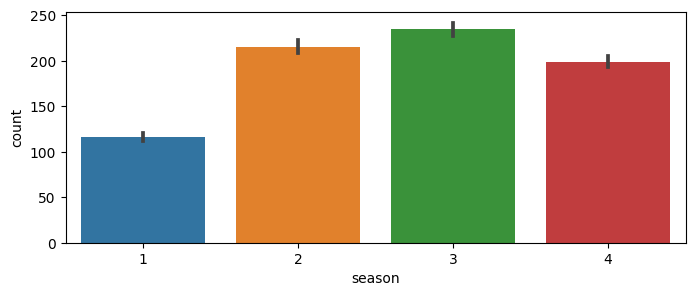

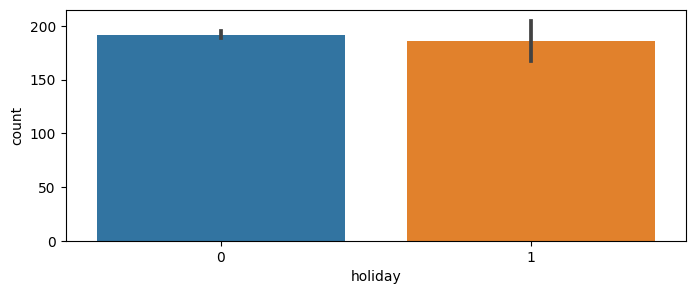

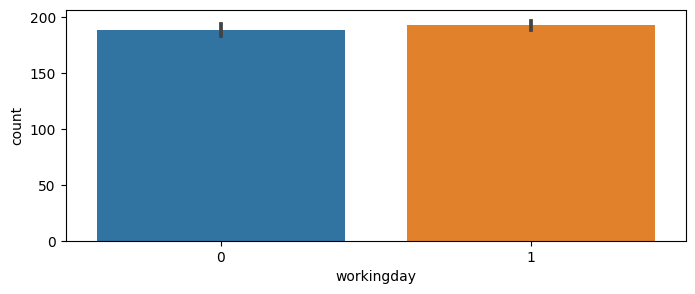

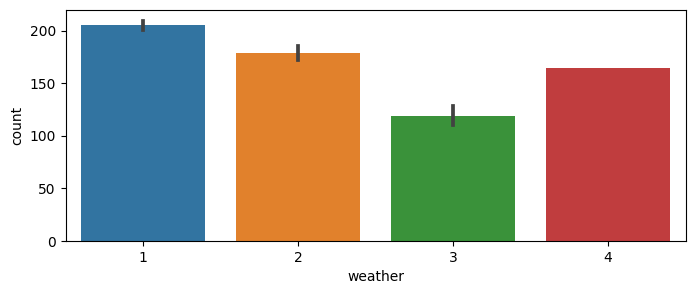

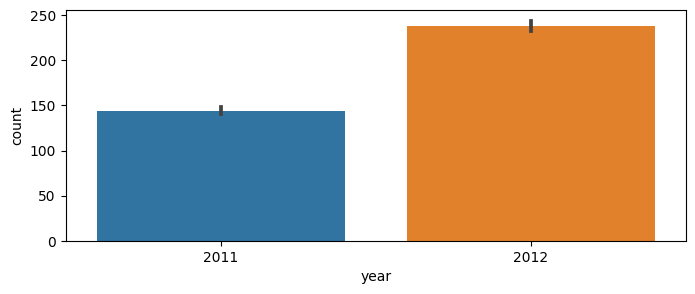

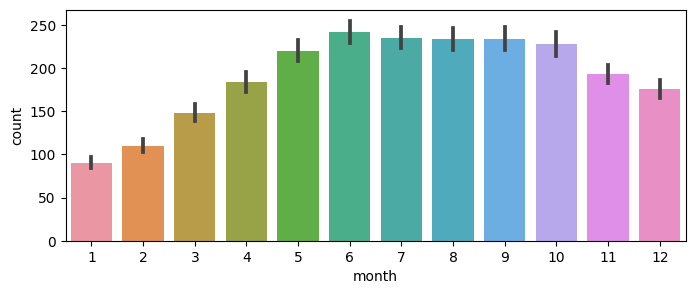

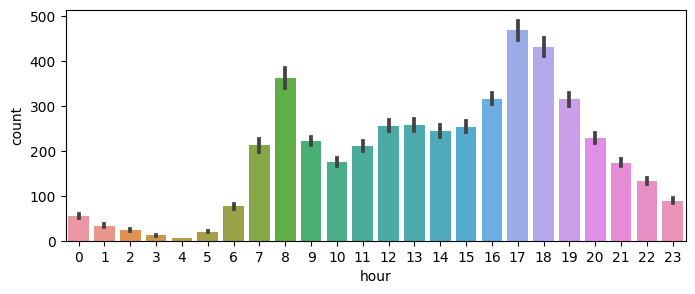

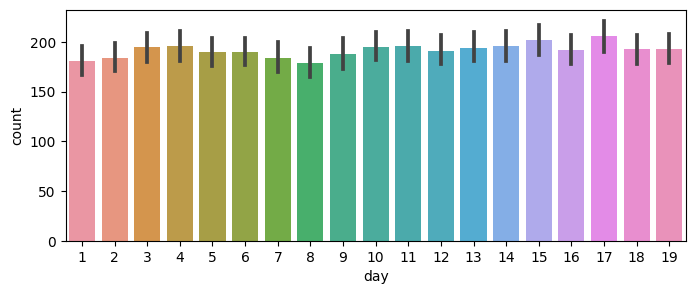

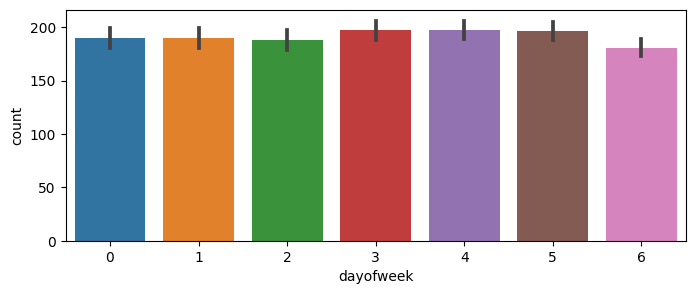

In [7]:
for i in categorical_columns:
    plt.figure(figsize=(8,3))
    sns.barplot(data = train,x= i, y= 'count')

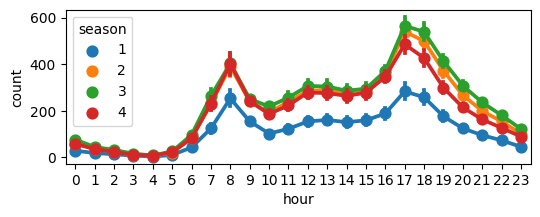

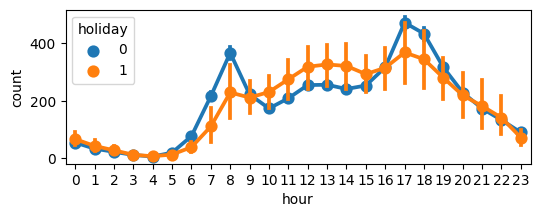

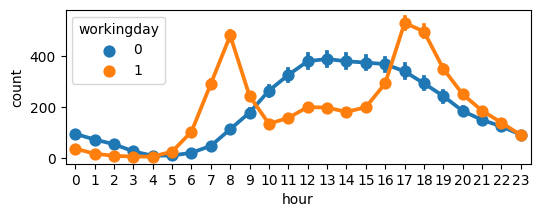

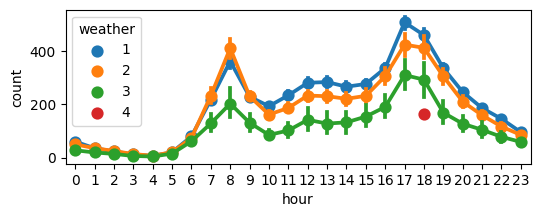

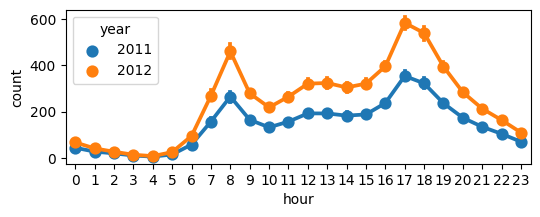

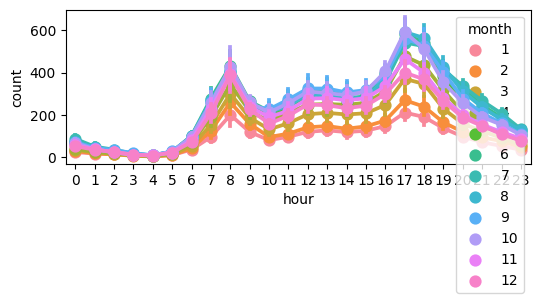

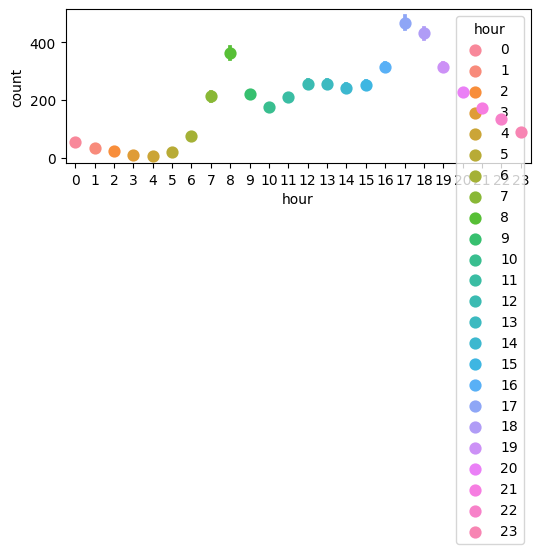

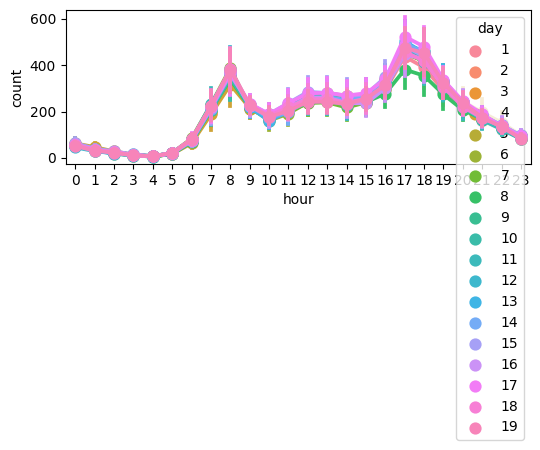

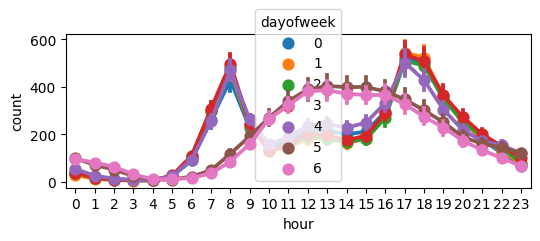

In [8]:
for i in categorical_columns:
    plt.figure(figsize=(6,2))
    sns.pointplot(data = train, x= 'hour',y ='count',  hue= i)
    plt.show()

In [9]:
categorical_columns

['season',
 'holiday',
 'workingday',
 'weather',
 'year',
 'month',
 'hour',
 'day',
 'dayofweek']

In [10]:
one_hot_encodings_columns = ['season','weather']
train = pd.get_dummies(train, columns = one_hot_encodings_columns)
test = pd.get_dummies(test, columns = one_hot_encodings_columns)



In [11]:
train.columns

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'year', 'month', 'hour',
       'day', 'dayofweek', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [12]:
train.drop(['datetime','workingday','casual','registered'],axis = 1, inplace = True)
test.drop(['datetime','workingday'],axis = 1, inplace = True)

In [13]:
test.columns

Index(['holiday', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month',
       'hour', 'day', 'dayofweek', 'season_1', 'season_2', 'season_3',
       'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

# 연속형 변수 확인
- heatmap
- scatter
- boxplot
- drop

In [14]:
continuous_columns = [
    'temp','atemp','humidity','windspeed'
]

<AxesSubplot:>

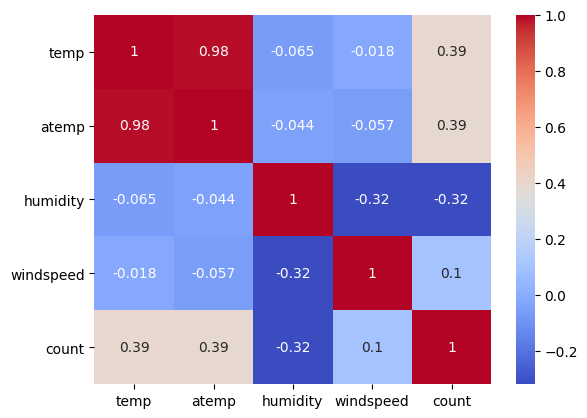

In [15]:
sns.heatmap(train[continuous_columns+['count']].corr(),annot = True,cmap = 'coolwarm')

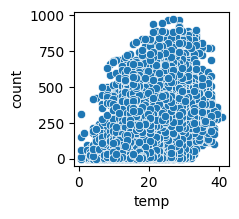

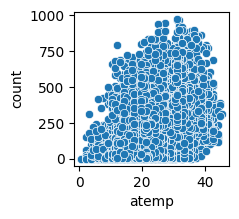

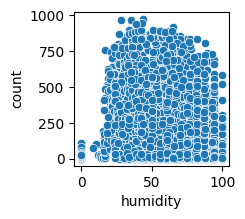

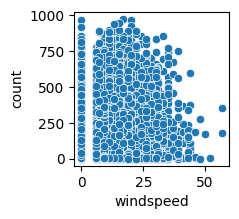

In [16]:
for i in continuous_columns:
    plt.figure(figsize=(2,2))
    sns.scatterplot(data= train, x = i, y= 'count')
    plt.show()

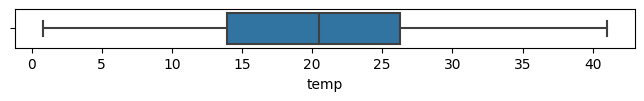

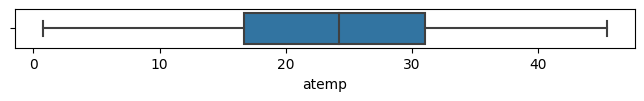

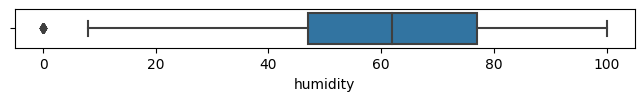

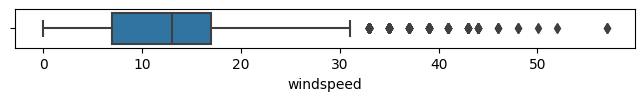

In [17]:
for i in continuous_columns:
    plt.figure(figsize= (8,0.5))
    sns.boxplot(data = train, x= i)
    plt.show()

In [18]:
drop_columns = ['atemp']

train.drop(drop_columns,axis = 1, inplace =True)
test.drop(drop_columns,axis = 1, inplace =True)

# 결측치 대체

In [19]:
train.loc[train['windspeed']==0,'windspeed'] = train['windspeed'].mean()
test.loc[test['windspeed']==0,'windspeed'] =test['windspeed'].mean()
train

,holiday,temp,humidity,windspeed,count,year,month,hour,day,dayofweek,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,9.84,81,12.799395,16,2011,1,0,1,5,1,0,0,0,1,0,0,0
1,0,9.02,80,12.799395,40,2011,1,1,1,5,1,0,0,0,1,0,0,0
2,0,9.02,80,12.799395,32,2011,1,2,1,5,1,0,0,0,1,0,0,0
3,0,9.84,75,12.799395,13,2011,1,3,1,5,1,0,0,0,1,0,0,0
4,0,9.84,75,12.799395,1,2011,1,4,1,5,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,15.58,50,26.002700,336,2012,12,19,19,2,0,0,0,1,1,0,0,0
10882,0,14.76,57,15.001300,241,2012,12,20,19,2,0,0,0,1,1,0,0,0
10883,0,13.94,61,15.001300,168,2012,12,21,19,2,0,0,0,1,1,0,0,0
10884,0,13.94,61,6.003200,129,2012,12,22,19,2,0,0,0,1,1,0,0,0


# 왜도, 첨도 확인


C:\Users\Songwooseok\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


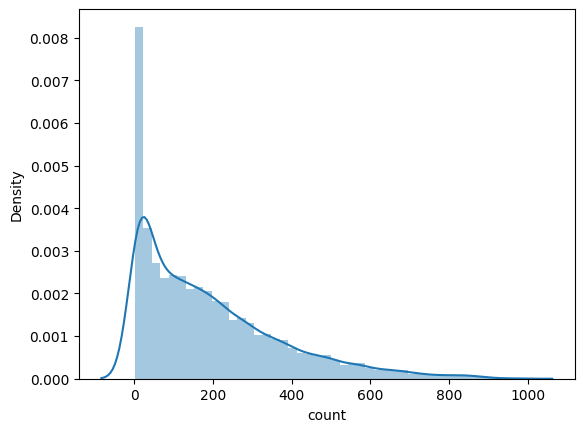

1.2420662117180776
1.3000929518398334


In [20]:
sns.distplot(train['count'])
plt.show()
print(train['count'].skew())
print(train['count'].kurt())


# 모델링
- 모델, split, minmax and log, 평가 

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import mean_squared_log_error, classification_report

x= train.drop(['count'],axis =1)
y= train['count']

x_train,x_val, y_train,y_val = train_test_split(x,y,test_size = 0.2)

minmax_scaler = MinMaxScaler()
x_train = minmax_scaler.fit_transform(x_train)
y_train = np.log(y_train)

model = GradientBoostingRegressor(n_estimators = 1000)
model.fit(x_train,y_train)

#x_val = minmax_scaler.fit_transform(x_val)
#y_pred_val = model.predict(x_val)
#y_pred_val = np.exp(y_pred_val)
#rmsle= np.sqrt(mean_squared_log_error(y_val,y_pred_val))
#print("error",rmsle)

test = minmax_scaler.fit_transform(test)
y_pred_test = model.predict(test)
y_pred_test =np.exp(y_pred_test)

submission = pd.read_csv("sampleSubmission.csv")
submission['count'] =y_pred_test
submission.to_csv("회귀.csv",index =False)

## holiday 예측

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x= train.drop(['holiday'],axis =1)
y= train['holiday']

x_train,x_val, y_train,y_val = train_test_split(x,y,test_size = 0.2)

model = RandomForestClassifier(n_estimators = 200, class_weight='balanced')
model.fit(x_train,y_train)

y_pred_val = model.predict(x_val)
print(classification_report(y_val,y_pred_val))

y_pred_test = model.predict(test)

submission = pd.read_csv("sampleSubmission.csv")
submission['count'] =y_pred_test
submission
submission.to_csv("분류.csv",index =False)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2112
           1       1.00      0.88      0.94        66

    accuracy                           1.00      2178
   macro avg       1.00      0.94      0.97      2178
weighted avg       1.00      1.00      1.00      2178



In [27]:
submission['count'].value_counts()

0    6493
Name: count, dtype: int64